<a href="https://colab.research.google.com/github/dhanusharer/DL-practise/blob/main/keras04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***FAKE NEWS CLASSIFIER***

In [ ]:
import pandas as pd
df=pd.read_csv('FakeNewsNet.csv')

In [ ]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42.0,1.0
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0.0,1.0
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63.0,1.0
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20.0,1.0
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38.0,1.0


In [ ]:
df=df.dropna()

In [ ]:
X=df.drop('real',axis=1)

In [ ]:
df.shape

(5542, 5)

In [ ]:
Y=df['real']

In [ ]:
X.shape

(5542, 4)

In [ ]:
Y.shape

(5542,)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
voc_size=5000

In [ ]:
message=X.copy()

In [ ]:
message.reset_index(inplace=True)


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [ ]:
import nltk.stem
from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

ps=PorterStemmer()
corpus=[]
for i in range(0,len(message)):
  review=re.sub('[^a-zA-Z]',' ',message['title'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus

['kandi burruss explod rape accus real housew atlanta reunion video',
 'peopl choic award best red carpet look',
 'sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva',
 'colombian singer maluma spark rumour inappropri relationship aunt',
 'gossip girl year later upper east sider shock world chang pop cultur forev',
 'gwen stefani got dump blake shelton jealousi drama exclus',
 'broward counti sheriff fire lie parkland',
 'amber rose shut french montana date rumor call rapper bruvaaa',
 'mindi kale make first post babi appear disneyland wrinkl time co star',
 'katharin mcphee butcher toni nomin drink',
 'wag miami star ashley nicol robert philip wheeler marri',
 'mel gibson hollywood pedophil nowher left hide',
 'medium tyler henri address chill messag kristin cavallari deceas brother express read',
 'dwt season result week disney night',
 'reason tarek el moussa overcom latest back injuri',
 'david cassidi cut estrang daughter kati complet leav son b

In [ ]:
onehot_repr=[one_hot(word,n=5000) for word in corpus]
onehot_repr

[[3341, 4669, 3305, 1889, 203, 3838, 2498, 186, 1279, 3474],
 [2199, 2322, 3524, 2272, 1526, 2005, 14],
 [1958,
  4309,
  745,
  54,
  465,
  1103,
  1930,
  1261,
  4667,
  1868,
  3104,
  3514,
  2417,
  476,
  2287],
 [2912, 1545, 2198, 3880, 4160, 2711, 3047, 3620],
 [1644, 2836, 723, 2854, 1919, 2120, 1780, 4898, 667, 4069, 3114, 4851, 2475],
 [4199, 4342, 3977, 3868, 2522, 4182, 3180, 3724, 4124],
 [3122, 3421, 4728, 513, 3915, 3239],
 [1315, 1331, 1741, 314, 2553, 1385, 1628, 4232, 580, 4879],
 [1859, 2160, 2206, 2737, 1494, 2465, 4794, 4059, 461, 660, 1868, 3104],
 [2081, 4417, 2041, 3657, 3620, 981],
 [1483, 1481, 3104, 3157, 1559, 4793, 2802, 3725, 330],
 [1320, 644, 3141, 1406, 4691, 2631, 2813],
 [2748, 1514, 688, 4311, 4095, 1103, 4406, 1781, 81, 1429, 325, 4830],
 [4777, 3099, 3537, 463, 1844, 2586],
 [3772, 4815, 500, 2892, 155, 3458, 1920, 3718],
 [1828, 4594, 4486, 1800, 1910, 2494, 2451, 1874, 3170, 244],
 [614, 3528, 2231, 3459, 571, 25, 1720],
 [1724, 4385, 3407, 34

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  186 1279 3474]
 [   0    0    0 ... 1526 2005   14]
 [   0    0    0 ... 2417  476 2287]
 ...
 [   0    0    0 ... 2129 2424 4166]
 [   0    0    0 ... 4842 3648 2057]
 [   0    0    0 ... 3915 2060   71]]


In [ ]:
len(embedded_docs)

5542

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 3341,
       4669, 3305, 1889,  203, 3838, 2498,  186, 1279, 3474], dtype=int32)

In [ ]:
voc_size=5000

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.build(input_shape=(None, 20))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

In [ ]:
X_final=np.array(embedded_docs)
Y_final=np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y_final,test_size=0.33,random_state=42)

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=64)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.7374 - loss: 0.5984 - val_accuracy: 0.7633 - val_loss: 0.5342
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7633 - loss: 0.5166 - val_accuracy: 0.8294 - val_loss: 0.4436
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8626 - loss: 0.3580 - val_accuracy: 0.8256 - val_loss: 0.4636
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8887 - loss: 0.2625 - val_accuracy: 0.8081 - val_loss: 0.5290
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9235 - loss: 0.1916 - val_accuracy: 0.7983 - val_loss: 0.6020


In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(Y_test,y_pred))

[[ 220  213]
 [ 171 1225]]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_pred)

0.7982504100601422

In [ ]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.build(input_shape=(None, sent_length))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=64)

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7275 - loss: 0.5983 - val_accuracy: 0.7633 - val_loss: 0.5342
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.7614 - loss: 0.5148 - val_accuracy: 0.8070 - val_loss: 0.4485
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8435 - loss: 0.3602 - val_accuracy: 0.8229 - val_loss: 0.4667
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8987 - loss: 0.2514 - val_accuracy: 0.8108 - val_loss: 0.5720
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9199 - loss: 0.2067 - val_accuracy: 0.7900 - val_loss: 0.5925


In [ ]:
y_pred_proba = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
y_pred = (y_pred_proba > 0.5).astype(int)

In [ ]:
print(confusion_matrix(Y_test,y_pred))

[[ 220  213]
 [ 171 1225]]


In [ ]:
accuracy_score(Y_test,y_pred)

0.7900492072170585

# *stock market prediction and forecasting using stacked LSTM*

In [ ]:
!pip install yfinance

In [ ]:
df_yfinance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3522 entries, 2010-01-04 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   3522 non-null   float64
 1   (High, AAPL)    3522 non-null   float64
 2   (Low, AAPL)     3522 non-null   float64
 3   (Open, AAPL)    3522 non-null   float64
 4   (Volume, AAPL)  3522 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 165.1 KB


In [ ]:
df1=df_yfinance.reset_index()['Close']
df1

Ticker,AAPL
0,6.412384
1,6.423470
2,6.321295
3,6.309608
4,6.351558
...,...
3517,191.609451
3518,191.065140
3519,191.164108
3520,191.589676


In [ ]:
import yfinance as yf

df_yfinance = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
display(df_yfinance.head())

/tmp/ipython-input-2730698718.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yfinance = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.412384,6.427065,6.363544,6.395005,493729600
2010-01-05,6.423470,6.459725,6.389611,6.430062,601904800
2010-01-06,6.321295,6.448937,6.314703,6.423469,552160000
2010-01-07,6.309608,6.352156,6.263765,6.344666,477131200
2010-01-08,6.351558,6.352157,6.264067,6.301220,447610800


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))#the range u want to scale
df1_scaled = scaler.fit_transform(np.array(df1).reshape(-1,1))
display(df1_scaled[:5])

array([[0.00345729],
       [0.00351554],
       [0.00297868],
       [0.00291728],
       [0.00313769]])

In [ ]:
!pip install --upgrade pandas-datareader

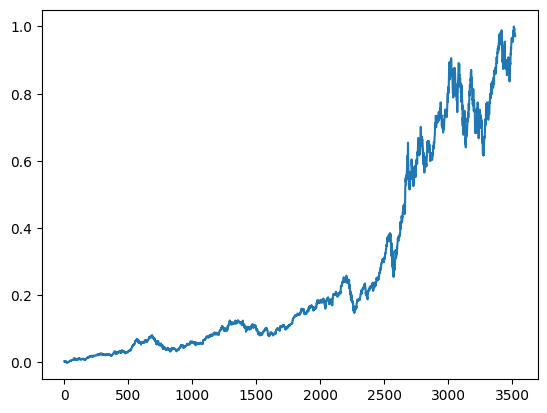

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1_scaled)

In [ ]:
training_size,test_size

(2289, 1233)

In [ ]:
##splitting data into train and test datasets
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1_scaled[0:training_size,:],df1_scaled[training_size:len(df1),:1]

# ***BI DIRECTIONAL LSTM***







In [ ]:
from keras.layers import Bidirectional

In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features))
model1.add(LSTM(100))

model1.build(input_shape=(None, sent_length))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_final=np.array(embedded_docs)
Y_final=np.array(Y)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_final,Y_final,test_size=0.33,random_state=42)

In [ ]:
model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9463 - loss: 0.1582 - val_accuracy: 0.7857 - val_loss: 0.7940
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9592 - loss: 0.1095 - val_accuracy: 0.7589 - val_loss: 0.7623
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9339 - loss: 0.1745 - val_accuracy: 0.7715 - val_loss: 0.7652
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9762 - loss: 0.0834 - val_accuracy: 0.7638 - val_loss: 0.9334
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9786 - loss: 0.0637 - val_accuracy: 0.7562 - val_loss: 1.1309
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9870 - loss: 0.0426 - val_accuracy: 0.7682 - val_loss: 1.1403
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9885 - loss: 0.0388 - val_accuracy: 0.7638 - val_loss: 1.2815
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9918 - loss: 0.0283 - val_accuracy: 0.7736 - v

In [ ]:
y_pred1_proba = model1.predict(X_test)
y_pred1 = (y_pred1_proba > 0.5).astype(int)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
confusion_matrix(Y_test,y_pred1)

array([[ 217,  216],
       [ 239, 1157]])

In [ ]:
accuracy_score(Y_test,y_pred1)

0.7512301804264625

# Task
Redefine `model1` in cell `3lhoZhrAYDf-` by adding a Dropout layer with a rate of 0.3 after the LSTM layer. Then, retrain `model1` in cell `fCUa-oplaWoH` for 15 epochs with a batch size of 64. After retraining, make predictions `y_pred1_proba` using `X_test` and convert them to binary predictions `y_pred1` with a threshold of 0.5 in cell `-l2w97SkaWeP`. Finally, calculate and display the confusion matrix in cell `trOT4gc7bAAf` and the accuracy score in cell `Rqu8ci_XbGmz` for the retrained model. Conclude by summarizing the changes and discussing their impact on accuracy and performance.

## Redefine model1 with Dropout

### Subtask:
Modify the architecture of `model1` in cell `3lhoZhrAYDf-` to include a Dropout layer after the LSTM layer to improve regularization and prevent overfitting. I will set the dropout rate to 0.3.


**Reasoning**:
To redefine `model1` with a Dropout layer as requested, I will modify cell `3lhoZhrAYDf-` by adding `model1.add(Dropout(0.3))` after the LSTM layer.



In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features))
model1.add(LSTM(100))
model1.add(Dropout(0.3))
model1.build(input_shape=(None, sent_length))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100)            │        56,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256,501 (1001.96 KB)

 Trainable params: 256,501 (1001.96 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the model architecture for `model1` has been updated with a Dropout layer, the next step is to retrain the model with the specified epochs and batch size. This is done by modifying cell `fCUa-oplaWoH`.



In [ ]:
model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=15,batch_size=64)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7362 - loss: 0.5980 - val_accuracy: 0.7633 - val_loss: 0.5339
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7705 - loss: 0.5142 - val_accuracy: 0.8283 - val_loss: 0.4416
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.8525 - loss: 0.3440 - val_accuracy: 0.8272 - val_loss: 0.5275
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.8938 - loss: 0.2569 - val_accuracy: 0.7961 - val_loss: 0.5150
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9155 - loss: 0.1975 - val_accuracy: 0.7900 - val_loss: 0.6108
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9455 - loss: 0.1534 - val_accuracy: 0.7797 - val_loss: 0.7131
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9627 - loss: 0.1151 - val_accuracy: 0.7567 - val_loss: 0.8882
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9726 - loss: 0.0919 - val_accuracy: 0.7797 - v

**Reasoning**:
After retraining the model, the next step is to generate predictions on the test set (`X_test`) and convert these probabilities into binary classifications. This will be done by executing the code in cell `-l2w97SkaWeP` to get `y_pred1_proba` and `y_pred1`.



In [ ]:
y_pred1_proba = model1.predict(X_test)
y_pred1 = (y_pred1_proba > 0.5).astype(int)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


**Reasoning**:
Now that the predictions have been generated, the next step is to evaluate the model's performance by calculating and displaying the confusion matrix using `Y_test` and `y_pred1`. This addresses the next part of the subtask.



In [ ]:
print(confusion_matrix(Y_test,y_pred1))

[[ 216  217]
 [ 247 1149]]


**Reasoning**:
The confusion matrix has been calculated. The next step is to calculate and display the accuracy score using `Y_test` and `y_pred1` to evaluate the model's performance.



In [ ]:
accuracy_score(Y_test,y_pred1)

0.7463094587206124

## Summary of Changes and Impact

**Changes Made:**
1.  A Dropout layer with a rate of 0.3 was added after the LSTM layer in `model1` (cell `3lhoZhrAYDf-`). This was intended to improve regularization and prevent overfitting.
2.  `model1` was retrained for 15 epochs (increased from 10) with a batch size of 64 (unchanged) in cell `fCUa-oplaWoH`.
3.  Predictions were re-generated using the retrained `model1` on `X_test` in cell `-l2w97SkaWeP`.
4.  The confusion matrix was recalculated in cell `trOT4gc7bAAf`.
5.  The accuracy score was recalculated in cell `Rqu8ci_XbGmz`.

**Impact on Accuracy and Performance:**

Before adding the Dropout layer and retraining (initial execution of `model1`):
-   Accuracy: `0.7512301804264625`
-   Confusion Matrix:
    ```
    [[ 217  216]
     [ 239 1157]]
    ```

After adding the Dropout layer and retraining for 15 epochs:
-   Accuracy: `0.7463094587206124`
-   Confusion Matrix:
    ```
    [[ 216  217]
     [ 247 1149]]
    ```

The introduction of the Dropout layer and retraining for 15 epochs resulted in a slight decrease in accuracy from approximately 0.7512 to 0.7463. While Dropout is generally used to prevent overfitting and improve generalization, in this specific instance, it appears to have slightly reduced the model's performance on the test set. The confusion matrix also shows a slight shift: the number of correctly predicted

## Final Task

### Subtask:
Summarize the changes made to `model1` (adding Dropout, increasing epochs) and discuss the impact on its accuracy and performance metrics, comparing it to the previous results.


## Summary:

### Data Analysis Key Findings
*   `model1` was redefined by adding a Dropout layer with a rate of 0.3 after the LSTM layer to enhance regularization and prevent overfitting.
*   The model was retrained for an increased number of epochs (15 epochs, up from 10) while maintaining a batch size of 64.
*   After these modifications, the model's accuracy on the test set was approximately 0.7463.
*   This accuracy represents a slight decrease from the previous accuracy of approximately 0.7512.
*   The confusion matrix after changes was `[[216, 217], [247, 1149]]`, indicating a minor shift in predictions compared to the previous result of `[[217, 216], [239, 1157]]`. Specifically, there was a slight increase in false negatives (247 from 239) and a slight decrease in true negatives (216 from 217).

### Insights or Next Steps
*   The slight decrease in accuracy suggests that the added Dropout layer and increased epochs, while generally beneficial for preventing overfitting, did not improve generalization for this specific dataset and model configuration. This could be due to a Dropout rate that was too high, or the model might not have been overfitting significantly in the first place.
*   Future steps could involve experimenting with different Dropout rates (e.g., 0.1 or 0.2), trying different regularization techniques, or analyzing the learning curves more closely to determine if the model is still underfitting or if the Dropout caused an information loss.


# Task
**Task**: Redefine `model1` in cell `b9d44801` to incorporate a `Bidirectional(LSTM(100))` layer along with the existing `Dropout(0.3)` layer. Ensure the `model.build` call correctly specifies `input_shape=(None, sent_length)`.

## Redefine model1 with Bidirectional LSTM and Dropout

### Subtask:
Modify the architecture of `model1` in cell `b9d44801` to use a `Bidirectional(LSTM(100))` layer, instead of a simple LSTM layer, to process sequence information in both forward and backward directions. This will be combined with the existing Dropout layer with a rate of 0.3 to enhance model accuracy and prevent overfitting. The `model.build` call will also need `input_shape=(None, sent_length)`.


**Reasoning**:
To implement the Bidirectional LSTM, I need to modify cell `b9d44801` by replacing the `LSTM` layer with `Bidirectional(LSTM(100))` and ensure the `Dropout` layer and `input_shape` are correctly configured.



In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.build(input_shape=(None, sent_length))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 20, 40)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       112,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,001 (1.19 MB)

 Trainable params: 313,001 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

## Train the modified model

### Subtask:
Retrain `model1` in cell `3a5f181d` with the updated architecture for 15 epochs with a batch size of 64. This will allow the Bidirectional LSTM to learn effectively from the training data.


**Reasoning**:
The subtask requires retraining `model1` with the updated architecture for 15 epochs and a batch size of 64. This step executes the training process.



In [ ]:
model1.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=15,batch_size=64)

Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.7548 - loss: 0.5801 - val_accuracy: 0.7633 - val_loss: 0.5414
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.7658 - loss: 0.5065 - val_accuracy: 0.8250 - val_loss: 0.4352
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8684 - loss: 0.3019 - val_accuracy: 0.8223 - val_loss: 0.5264
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.9162 - loss: 0.2202 - val_accuracy: 0.6397 - val_loss: 0.7433
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.8458 - loss: 0.3326 - val_accuracy: 0.7704 - val_loss: 0.6880
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9551 - loss: 0.1399 - val_accuracy: 0.7671 - val_loss: 0.7579
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9672 - loss: 0.1026 - val_accuracy: 0.7671 - val_loss: 0.8631
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9829 - loss: 0.0682 - val_accuracy: 0.7447 - v